Revisit the notes on association rule mining and the R example on music playlists: playlists.R and playlists.csv. Then use the data on grocery purchases in groceries.txt and find some interesting association rules for these shopping baskets. The data file is a list of shopping baskets: one person's basket for each row, with multiple items per row separated by commas. Pick your own thresholds for lift and confidence; just be clear what these thresholds are and say why you picked them. Do your discovered item sets make sense? Present your discoveries in an interesting and visually appealing way.

Notes:

This is an exercise in visual and numerical story-telling. Do be clear in your description of what you've done, but keep the focus on the data, the figures, and the insights your analysis has drawn from the data, rather than technical details.
The data file is a list of baskets: one row per basket, with multiple items per row separated by commas. You'll have to cobble together your own code for processing this into the format expected by the "arules" package. This is not intrinsically all that hard, but it is the kind of data-wrangling wrinkle you'll encounter frequently on real problems, where your software package expects data in one format and the data comes in a different format. Figuring out how to bridge that gap is part of the assignment, and so we won't be giving tips on this front.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

### Step 1: Load and Prepare the Raw Text Dataset

In [6]:
# Load the data
with open("groceries.txt", "r") as f:
    lines = f.readlines()

# Preprocess the data and create a list of unique items
basket_list = [line.strip().split(",") for line in lines]

In [7]:
unique_items = set(item for basket in basket_list for item in basket)

# Create a dictionary to hold the presence of each item in each basket
basket_dict = {item: [] for item in unique_items}

# Populate the dictionary with True or False values based on item presence
for basket in basket_list:
    for item in unique_items:
        if item in basket:
            basket_dict[item].append(True)
        else:
            basket_dict[item].append(False)

# Create a DataFrame from the dictionary
df = pd.DataFrame(basket_dict)

# Print the processed DataFrame
df

,cereals,domestic eggs,flower (seeds),skin care,kitchen towels,nuts/prunes,canned fish,flour,frozen fruits,hygiene articles,...,specialty bar,flower soil/fertilizer,fish,frozen dessert,tidbits,sound storage medium,oil,preservation products,brandy,seasonal products
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
all_it = [item for sublist in basket_list for item in sublist]

counts = pd.Series(all_it).value_counts()

freq_df = pd.DataFrame({'Item': counts.index, 'Frequency': counts.values})

freq_df.head(20)

,Item,Frequency
0,whole milk,2513
1,other vegetables,1903
2,rolls/buns,1809
3,soda,1715
4,yogurt,1372
5,bottled water,1087
6,root vegetables,1072
7,tropical fruit,1032
8,shopping bags,969
9,sausage,924


We see milk and other vegetables frequenting the dataset - This will be frequent during our association rules also.

### Step 2: Create the association rules

A low threshold like 0.003 allows us to capture associations involving relatively rare items. If an item occurs in only a small percentage of baskets, this threshold ensures that we don't miss potentially meaningful associations involving such items.

Choosing a higher lift threshold of 3 indicates that we are interested in identifying strong associations between items. This means that the observed co-occurrence of items in a rule should be at least three times more frequent than expected by chance.

In [14]:
#Applying Apriori Algorithm on all items

items_frequency = apriori(df, min_support = 0.003, use_colnames=True)
print(items_frequency.sort_values(by='itemsets',ascending=False))

rules = association_rules(items_frequency, metric="lift", min_threshold=3)
rules.sort_values(by='lift',ascending=False)

       support                                           itemsets
0     0.005694                                          (cereals)
1486  0.004677            (whole milk, other vegetables, waffles)
1480  0.005796               (beef, other vegetables, rolls/buns)
1481  0.004982            (other vegetables, rolls/buns, chicken)
1482  0.003864             (whole milk, waffles, root vegetables)
...        ...                                                ...
737   0.003864                       (fruit/vegetable juice, ham)
736   0.004982                                        (soda, ham)
735   0.004982                                     (sausage, ham)
734   0.004169                          (whipped/sour cream, ham)
2224  0.003559  (whole milk, yogurt, root vegetables, other ve...

[2225 rows x 2 columns]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1326,"(tropical fruit, root vegetables)","(whole milk, citrus fruit, other vegetables)",0.021047,0.013015,0.003152,0.149758,11.506831,0.002878,1.160829,0.932726
1309,"(whole milk, citrus fruit, other vegetables)","(tropical fruit, root vegetables)",0.013015,0.021047,0.003152,0.242188,11.506831,0.002878,1.291814,0.925136
38,(hamburger meat),(Instant food products),0.033249,0.008033,0.003050,0.091743,11.421438,0.002783,1.092166,0.943826
39,(Instant food products),(hamburger meat),0.008033,0.033249,0.003050,0.379747,11.421438,0.002783,1.558640,0.919834
1322,"(citrus fruit, root vegetables)","(whole milk, other vegetables, tropical fruit)",0.017692,0.017082,0.003152,0.178161,10.429837,0.002850,1.195998,0.920405
...,...,...,...,...,...,...,...,...,...,...
753,(other vegetables),"(whole milk, citrus fruit, whipped/sour cream)",0.193493,0.006304,0.003660,0.018917,3.000865,0.002441,1.012857,0.826729
119,(citrus fruit),"(pip fruit, root vegetables)",0.082766,0.015557,0.003864,0.046683,3.000835,0.002576,1.032651,0.726924
118,"(pip fruit, root vegetables)",(citrus fruit),0.015557,0.082766,0.003864,0.248366,3.000835,0.002576,1.220321,0.677296
1187,"(yogurt, other vegetables)","(whole milk, margarine)",0.043416,0.024199,0.003152,0.072600,3.000069,0.002101,1.052189,0.696933


In [15]:
rules['rules'] = rules.apply(lambda row: f"{', '.join(row['antecedents'])} -> {', '.join(row['consequents'])}", axis=1)
rules.sort_values(by='lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,rules
1326,"(tropical fruit, root vegetables)","(whole milk, citrus fruit, other vegetables)",0.021047,0.013015,0.003152,0.149758,11.506831,0.002878,1.160829,0.932726,"tropical fruit, root vegetables -> whole milk,..."
1309,"(whole milk, citrus fruit, other vegetables)","(tropical fruit, root vegetables)",0.013015,0.021047,0.003152,0.242188,11.506831,0.002878,1.291814,0.925136,"whole milk, citrus fruit, other vegetables -> ..."
38,(hamburger meat),(Instant food products),0.033249,0.008033,0.003050,0.091743,11.421438,0.002783,1.092166,0.943826,hamburger meat -> Instant food products
39,(Instant food products),(hamburger meat),0.008033,0.033249,0.003050,0.379747,11.421438,0.002783,1.558640,0.919834,Instant food products -> hamburger meat
1322,"(citrus fruit, root vegetables)","(whole milk, other vegetables, tropical fruit)",0.017692,0.017082,0.003152,0.178161,10.429837,0.002850,1.195998,0.920405,"citrus fruit, root vegetables -> whole milk, o..."
...,...,...,...,...,...,...,...,...,...,...,...
753,(other vegetables),"(whole milk, citrus fruit, whipped/sour cream)",0.193493,0.006304,0.003660,0.018917,3.000865,0.002441,1.012857,0.826729,"other vegetables -> whole milk, citrus fruit, ..."
119,(citrus fruit),"(pip fruit, root vegetables)",0.082766,0.015557,0.003864,0.046683,3.000835,0.002576,1.032651,0.726924,"citrus fruit -> pip fruit, root vegetables"
118,"(pip fruit, root vegetables)",(citrus fruit),0.015557,0.082766,0.003864,0.248366,3.000835,0.002576,1.220321,0.677296,"pip fruit, root vegetables -> citrus fruit"
1187,"(yogurt, other vegetables)","(whole milk, margarine)",0.043416,0.024199,0.003152,0.072600,3.000069,0.002101,1.052189,0.696933,"yogurt, other vegetables -> whole milk, margarine"


### Step 3: Visualization for Support, Lift and Confidence for rules

### Top 10 association rules on the basis of Confidence

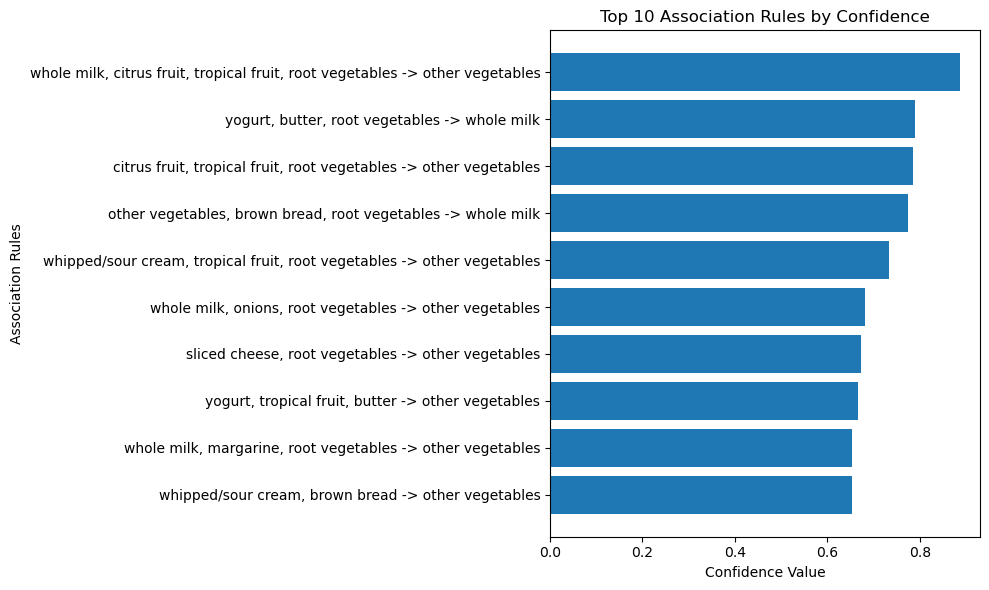

In [16]:
top_rules = rules.nlargest(10, 'confidence')

associations = top_rules['rules']
conf = top_rules['confidence']

plt.figure(figsize=(10, 6))
plt.barh(associations, conf)
plt.xlabel('Confidence Value')
plt.ylabel('Association Rules')
plt.title('Top 10 Association Rules by Confidence')
plt.gca().invert_yaxis()
plt.tight_layout()

plt.show()

In [17]:
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,rules
1305,"(whole milk, citrus fruit, tropical fruit, roo...",(other vegetables),0.003559,0.193493,0.003152,0.885714,4.577509,0.002463,7.056940,0.784332,"whole milk, citrus fruit, tropical fruit, root..."
863,"(yogurt, butter, root vegetables)",(whole milk),0.003864,0.255516,0.003050,0.789474,3.089723,0.002063,3.536299,0.678970,"yogurt, butter, root vegetables -> whole milk"
719,"(citrus fruit, tropical fruit, root vegetables)",(other vegetables),0.005694,0.193493,0.004474,0.785714,4.060694,0.003372,3.763701,0.758053,"citrus fruit, tropical fruit, root vegetables ..."
937,"(other vegetables, brown bread, root vegetables)",(whole milk),0.004067,0.255516,0.003152,0.775000,3.033078,0.002113,3.308818,0.673039,"other vegetables, brown bread, root vegetables..."
1018,"(whipped/sour cream, tropical fruit, root vege...",(other vegetables),0.004575,0.193493,0.003355,0.733333,3.789981,0.002470,3.024403,0.739530,"whipped/sour cream, tropical fruit, root veget..."
951,"(whole milk, onions, root vegetables)",(other vegetables),0.004779,0.193493,0.003254,0.680851,3.518744,0.002329,2.527056,0.719245,"whole milk, onions, root vegetables -> other v..."
214,"(sliced cheese, root vegetables)",(other vegetables),0.005592,0.193493,0.003762,0.672727,3.476759,0.002680,2.464328,0.716382,"sliced cheese, root vegetables -> other vegeta..."
1292,"(yogurt, tropical fruit, butter)",(other vegetables),0.004575,0.193493,0.003050,0.666667,3.445437,0.002165,2.419522,0.713023,"yogurt, tropical fruit, butter -> other vegeta..."
929,"(whole milk, margarine, root vegetables)",(other vegetables),0.004982,0.193493,0.003254,0.653061,3.375122,0.002290,2.324639,0.707238,"whole milk, margarine, root vegetables -> othe..."
502,"(whipped/sour cream, brown bread)",(other vegetables),0.004677,0.193493,0.003050,0.652174,3.370536,0.002145,2.318709,0.706616,"whipped/sour cream, brown bread -> other veget..."


The first rule suggests that the combination of items (citrus fruit, tropical fruit, whole milk, root vegetables) tends to be associated with the purchase of "other vegetables" with a relatively high confidence of 88.57%.  This suggests a common preference for these items as part of a healthy diet.

The second rule indicates that if a customer purchases (root vegetables, yogurt, butter), there's a 78.95% confidence that they will also buy "whole milk". While not as strong as the previous rule, this association might indicate a preference for dairy products in combination.

The third rule implies that the combination of items (citrus fruit, root vegetables, tropical fruit) is likely to be associated with the purchase of "other vegetables" with a confidence of 78.57

### Top 10 association rules on the basis of Support

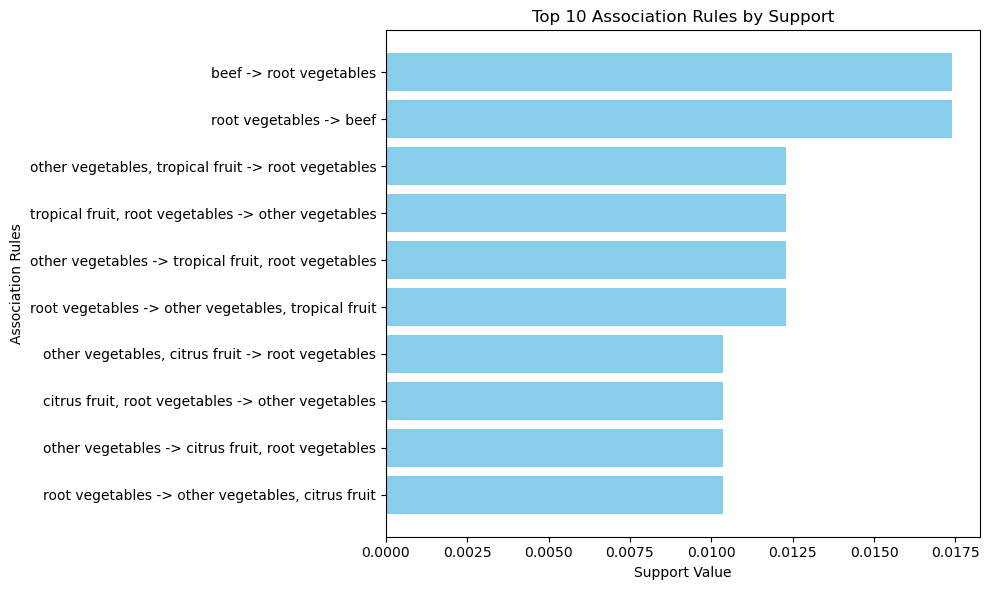

In [18]:
top_rules1 = rules.nlargest(10, 'support')

associations = top_rules1['rules']
sup_values = top_rules1['support']

plt.figure(figsize=(10, 6))
plt.barh(associations, sup_values, color='skyblue')
plt.xlabel('Support Value')
plt.ylabel('Association Rules')
plt.title('Top 10 Association Rules by Support')
plt.gca().invert_yaxis() 
plt.tight_layout()

plt.show()

In [19]:
top_rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,rules
24,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628,0.708251,beef -> root vegetables
25,(root vegetables),(beef),0.108998,0.052466,0.017387,0.159515,3.040367,0.011668,1.127366,0.753189,root vegetables -> beef
238,"(other vegetables, tropical fruit)",(root vegetables),0.035892,0.108998,0.012303,0.342776,3.144780,0.008391,1.355705,0.707403,"other vegetables, tropical fruit -> root veget..."
239,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,0.683367,"tropical fruit, root vegetables -> other veget..."
240,(other vegetables),"(tropical fruit, root vegetables)",0.193493,0.021047,0.012303,0.063584,3.020999,0.008231,1.045425,0.829482,"other vegetables -> tropical fruit, root veget..."
241,(root vegetables),"(other vegetables, tropical fruit)",0.108998,0.035892,0.012303,0.112873,3.144780,0.008391,1.086776,0.765445,"root vegetables -> other vegetables, tropical ..."
128,"(other vegetables, citrus fruit)",(root vegetables),0.028876,0.108998,0.010371,0.359155,3.295045,0.007224,1.390354,0.717225,"other vegetables, citrus fruit -> root vegetables"
129,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,0.681990,"citrus fruit, root vegetables -> other vegetables"
130,(other vegetables),"(citrus fruit, root vegetables)",0.193493,0.017692,0.010371,0.053600,3.029608,0.006948,1.037941,0.830649,"other vegetables -> citrus fruit, root vegetables"
131,(root vegetables),"(other vegetables, citrus fruit)",0.108998,0.028876,0.010371,0.095149,3.295045,0.007224,1.073242,0.781720,"root vegetables -> other vegetables, citrus fruit"


Frequent Pairing: Rule 8 (root vegetables) -> (beef)

Support: 0.0174
Inference: Root vegetables and beef are frequently purchased together with a support of 1.74%. This suggests that customers who buy root vegetables are likely to also buy beef, possibly indicating meal preparation patterns.


Two-Way Frequent Pairing: Rule 380 (other vegetables, tropical fruit) -> (root vegetables)
Support: 0.0123
Inference: The combination of other vegetables and tropical fruit is associated with purchasing root vegetables with a support of 1.23%. This two-way connection hints at the idea that customers who choose these fruits and vegetables may also include root vegetables in their baskets.

Seasonal Influence: Rule 381 (root vegetables, tropical fruit) -> (other vegetables)
Support: 0.0123
Inference: Customers purchasing root vegetables and tropical fruit together tend to buy other vegetables as well (support of 1.23%). This could reflect a preference for combining different types of produce, which might vary seasonally.

Exploration of Healthy Options: Rule 326 (other vegetables, citrus fruit) -> (root vegetables)
Support: 0.0104
Inference: Customers buying both other vegetables and citrus fruit show an interest in root vegetables as well (support of 1.04%). This suggests an inclination towards healthier food choices by including a variety of vegetables in their baskets.

Complementary Choices: Rule 327 (citrus fruit, root vegetables) -> (other vegetables)
Support: 0.0104
Inference: Customers purchasing both citrus fruit and root vegetables tend to also buy other vegetables (support of 1.04%). This association indicates a potential preference for a well-rounded assortment of fruits and vegetables.

These interpretations highlight the support values of the association rules, indicating the prevalence of certain item combinations in customers' shopping baskets. The higher support values suggest stronger associations, potentially guiding retailers in creating strategic marketing or placement strategies for these items.

### Top 10 association rules on the basis of Lift

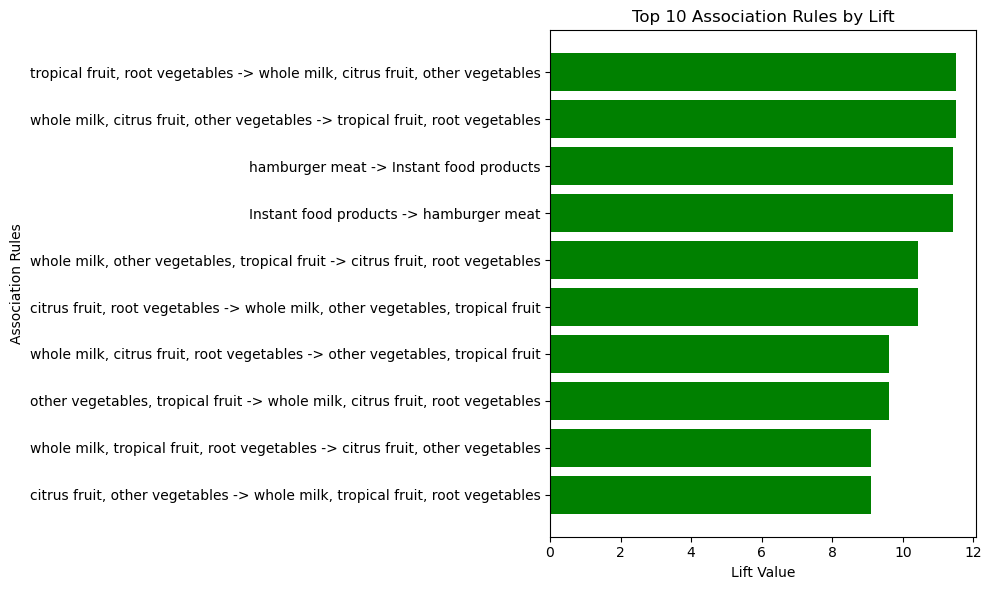

In [20]:
top_rules2 = rules.nlargest(10, 'lift')

associations = top_rules2['rules']
lift_values = top_rules2['lift']
plt.figure(figsize=(10, 6))
plt.barh(associations, lift_values, color='green')
plt.xlabel('Lift Value')
plt.ylabel('Association Rules')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis() 
plt.tight_layout()

plt.show()

In [21]:
top_rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,rules
1326,"(tropical fruit, root vegetables)","(whole milk, citrus fruit, other vegetables)",0.021047,0.013015,0.003152,0.149758,11.506831,0.002878,1.160829,0.932726,"tropical fruit, root vegetables -> whole milk,..."
1309,"(whole milk, citrus fruit, other vegetables)","(tropical fruit, root vegetables)",0.013015,0.021047,0.003152,0.242188,11.506831,0.002878,1.291814,0.925136,"whole milk, citrus fruit, other vegetables -> ..."
38,(hamburger meat),(Instant food products),0.033249,0.008033,0.003050,0.091743,11.421438,0.002783,1.092166,0.943826,hamburger meat -> Instant food products
39,(Instant food products),(hamburger meat),0.008033,0.033249,0.003050,0.379747,11.421438,0.002783,1.558640,0.919834,Instant food products -> hamburger meat
1313,"(whole milk, other vegetables, tropical fruit)","(citrus fruit, root vegetables)",0.017082,0.017692,0.003152,0.184524,10.429837,0.002850,1.204582,0.919834,"whole milk, other vegetables, tropical fruit -..."
1322,"(citrus fruit, root vegetables)","(whole milk, other vegetables, tropical fruit)",0.017692,0.017082,0.003152,0.178161,10.429837,0.002850,1.195998,0.920405,"citrus fruit, root vegetables -> whole milk, o..."
1308,"(whole milk, citrus fruit, root vegetables)","(other vegetables, tropical fruit)",0.009151,0.035892,0.003152,0.344444,9.596632,0.002824,1.470673,0.904070,"whole milk, citrus fruit, root vegetables -> o..."
1327,"(other vegetables, tropical fruit)","(whole milk, citrus fruit, root vegetables)",0.035892,0.009151,0.003152,0.087819,9.596632,0.002824,1.086241,0.929146,"other vegetables, tropical fruit -> whole milk..."
1312,"(whole milk, tropical fruit, root vegetables)","(citrus fruit, other vegetables)",0.011998,0.028876,0.003152,0.262712,9.097786,0.002806,1.317156,0.900892,"whole milk, tropical fruit, root vegetables ->..."
1323,"(citrus fruit, other vegetables)","(whole milk, tropical fruit, root vegetables)",0.028876,0.011998,0.003152,0.109155,9.097786,0.002806,1.109062,0.916550,"citrus fruit, other vegetables -> whole milk, ..."


Complementary Purchase Patterns: Items like "tropical fruit" and "root vegetables" are often purchased together, leading to a high lift value of 11.51. This indicates that customers who buy these items are more likely to also purchase a combination of "other vegetables," "citrus fruit," and "whole milk." This insight suggests that customers are inclined to create well-rounded meals or recipes.

Cross-Category Associations: Surprisingly, "hamburger meat" and "Instant food products" exhibit a strong association (lift of 11.42). This implies that customers who opt for "hamburger meat" are also interested in convenient and quick food solutions like "Instant food products." This could be attributed to a demand for easy-to-prepare meals.

Health-Conscious Choices: Customers purchasing a combination of "other vegetables," "tropical fruit," and "whole milk" show a high lift of 10.43 towards "citrus fruit" and "root vegetables." This suggests a health-conscious approach, where customers seek a variety of fresh produce and dairy products.

Influence of Versatile Ingredients: The combination of "citrus fruit," "root vegetables," and "whole milk" leads to a likelihood of purchasing "other vegetables" and "tropical fruit" (lift of 9.60). This might indicate the versatility of these ingredients, as they can be used in both sweet and savory dishes.

These findings underscore the importance of understanding purchase behavior beyond individual items, emphasizing how certain items naturally complement each other in customers' shopping baskets

### Plot datapoints for Support v/s Confidence

In [22]:
import plotly.express as px
fig = px.scatter(rules, x='support', y='confidence', hover_data=['lift'])
fig.show()

c:\Users\awaly\anaconda3\Lib\site-packages\plotly\express\imshow_utils.py:24: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  np.bool8: (False, True),
c:\Users\awaly\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

c:\Users\awaly\anaconda3\Lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



Next, we will use Gephy to try and visualize the network to see the relationships between rules with lift more than 4

In [28]:
# Filter rules based on lift
subset_rules = rules[rules['lift'] > 4]

In [29]:
import networkx as nx


# Create a directed graph
shopping_graph = nx.DiGraph()

# Extract antecedents and consequents from the 'Rule' column
for _, row in subset_rules.iterrows():
    rule = row['rules']
    antecedent, consequent = map(str.strip, rule.split('->'))

    # Add nodes and edges to the graph
    shopping_graph.add_edge(antecedent, consequent)

# Save the graph as a GraphML file
nx.write_graphml(shopping_graph, 'shopping.graphml')

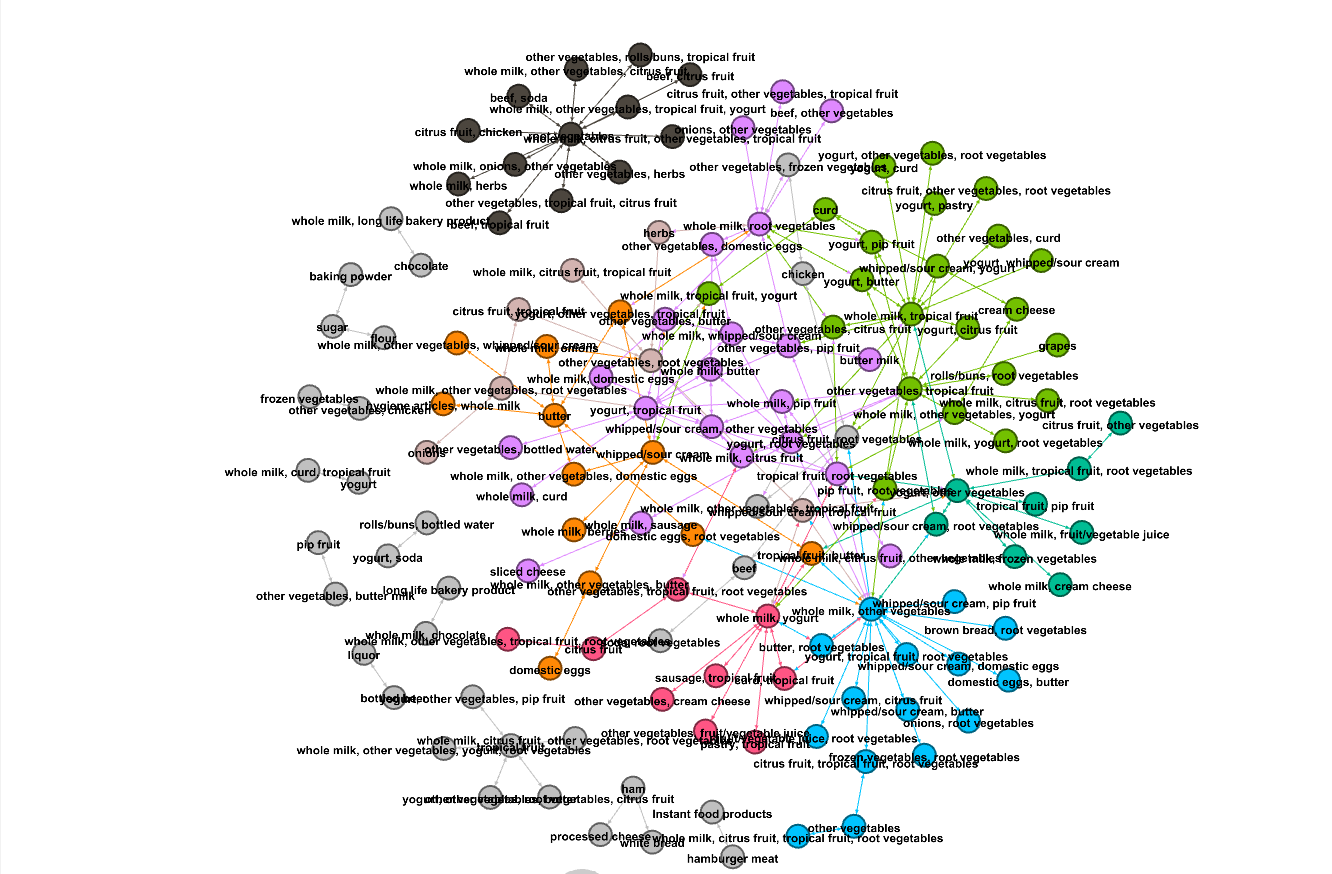

In [34]:
from IPython.display import display, Image
display(Image(filename=r'C:\Users\awaly\Downloads\Python Notebooks\Introduction to Machine Learning\ML Project 2\shopping rules.png'))